# Nummeriske løsninger Fysikk prosjekt

### Av: Sahil, Jesper og Sam

### Eulers metode

Euelers metode har utagangspunkt i Newtons kvotient:

$$f'(x) = \frac{f(x+dx)-f(x)}{dx}$$

For å løse differensial likninger må neste tilstanden i systemet utrykkes.

da må settes $f(x+dx)$ alene.

Da kommer vi fram til Eulers metode

$$f(x+dx) = f(x) + f'(x) \cdot dx$$

Denne metoden brukes for å finne ut neste tilstand i et system ut i fra endringen i systemet.

Eksempelhvis kan vi finne vinkelfart ($\omega$) gitt at vi har startbetingelser og et utrykk for vinkelaksellerasjon ($\alpha$):

$$\omega(t_{n+1}) = \omega(t_n) + \alpha'(t_n) \cdot dt$$

På samme måte kan vi finne et utrykk for vinkelen. ($\theta$)

Denne formuleringen av utrykket indikerer at neste tilstand i systemet er den forrige tilstandet addert med produktet av stigningen og forskjell i t.

Med utgangspunkt i dette har vi skrevet våre nummeriske løsninger til oppgavene.

## Oppgave 1

---

#### Relevante uttrykk fra rapport

(8) $$\alpha(t) = g\sin{\theta(t)}/r$$

(10) $$g\cos{\theta}-\omega^2 r \leq 0$$

##### Importerer pylab, stort library med det meste av math, numpy og matplotlib

In [1]:
from pylab import *  
# pylab inneholder det meste av det man kan trenge noen gang i en oppgave som dette
# gjennom importere alt slipper man det meste av referering til libraries mens man coder

#### Globale variabler

In [2]:
g = 9.81
r_halvkule = 0.51   # meter

r_kule = 0.0215     # meter
m_kule = 0.167      # kilogram

r_sylinder_hul = 0.022
m_sylinder_hul = 0.215

r_sylinder_fast = 0.0215
m_sylinder_fast = 1.795

tN = 100000         # N tidssteg

#### Funksjon for eulers metode opg 1

In [3]:
def euler_opg1(theta0,m,r): # euler med sum av krefter betraktning
    """
    theta0: start vinkel, for å initialisere eulers metode
    m: masse til objekt
    r: radius til objekt
    """
    r += r_halvkule  # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))       # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r)  # alpha gitt ved likning (8)
    
    # kritisk vinkel
    thetakrit = 0
    
    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):   # -1 for å unngå indekseringsfeil
        omega[i+1] = omega[i] + alpha[i] * dt # eulersmetode, fyller inn neste verdi i array basert på de foregående
        theta[i+1] = theta[i] + omega[i] * dt
        alpha[i+1] = (g*sin(theta[i]))/(r) # alpha gitt ved likning (8)
        
        if -omega[i]**2*r+g*cos(theta[i])<=0: # betingelse gitt ved likning (10)
            
            return theta[i]*180/pi # returnerer kritisk vinker gitt i grader

#### eksempel kjøring av kode

In [4]:
kule = euler_opg1(0.35325464060365225,m_kule,r_kule)
print('kule:', kule)

sylinder_hul = euler_opg1(0.35325464060365225,m_sylinder_hul,r_sylinder_hul)
print('sylinder:',sylinder_hul)

sylinder_fast = euler_opg1(0.001,m_sylinder_fast,r_sylinder_fast)
print(sylinder_fast)


kule: 51.29287373252918
sylinder: 51.285828780694956
48.200823815034234


## Oppgave 2

---

#### Relevante uttrykk fra rapport

(10) $$g\cos{\theta}-\omega^2 r \leq 0$$

(16) $$\alpha =\frac{g\sin{\theta}}{r(c+1)}$$



#### Globale variabler

In [5]:
# c er fra I0 til objektene, f.eks I0_kule = 2/5mr**r, c = 2/5
c_kule = 2/5
c_sylinder_hul = 1
c_sylinder_fast = 1/2

#### Funksjon for eulers metode for opg 2

In [6]:
def euler_opg2(theta0,m,r,c): # euler med sum av krefter betraktning
    """
    theta0: start vinkel, for å initialisere eulers metode
    m: masse til objekt
    r: radius til objekt
    c: c til objekt, utrykker bla annet deriemoment I0
    """
    
    r += r_halvkule     # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                 # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))           # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r*(c+1)) # alpha gitt ved likning (16)
    
    # kritisk vinkel
    thetakrit = 0

    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + alpha[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
        alpha[i+1] = (g*sin(theta[i]))/(r*(c+1)) # alpha gitt ved likning (16)
        
        
        if -omega[i]**2*r+g*cos(theta[i])<=0: # betingelse gitt ved likning (10)
            
            return theta[i]*180/pi
        
    return thetakrit*180/pi # returnerer kritisk vinker gitt i grader

#### Eksempel kjøring av kode

In [7]:
kule = euler_opg2(20.8*pi/180,m_kule,r_kule,c_kule)
print('kule:', kule)

sylinder_hul = euler_opg2(20.8*pi/180,m_sylinder_hul,r_sylinder_hul,c_sylinder_hul)
print('sylinder:',sylinder_hul)

kule: 56.6440832606659
sylinder: 62.145182983630185


## Oppgave 3

---

#### Relevante uttrykk fra rapport

(10) $$g\cos{\theta}-\omega^2 r \leq 0$$

(16) $$\alpha =\frac{g\sin{\theta}}{r(c+1)}$$

(20) $$\mu_{s} = \frac{c\ \sin{\theta}}{-2\cos{\theta}+(c+1)\cos{\theta_{slipp}}}$$

(22) $$\alpha = \frac{d\omega}{dt} = \frac{g}{r}(\sin{\theta}-\mu_{k}\cos{\theta})+\mu_{k}\omega^2$$

#### Globale varialbler

In [14]:
my_s = 0.6     # intervall funnet på internett (0.5,0.6) se referanse i rapport
my_k = 0.5     # intervall funnet på internett (0.4,0.6)

#### Funksjon for eulers metode for opg 3

In [15]:
def euler_opg3(theta0,m,r,c):
    """
    theta0: start vinkel, for å initialisere eulers metode
    m: masse til objekt
    r: radius til objekt
    c: c til objekt, utrykker bla annet deriemoment I0
    """
    
    r += r_halvkule     # slik at lille r er (r+R)
    
    # tid
    global t                    # til evt plotting 
    t_total = 7                 # sekunder
    t = linspace(0,t_total,tN)  # tidsdiskretisering (array)
    dt = t[1]-t[0]              # tidssteg
    
    # arrayer for relevante verdier
    theta = zeros(len(t))       # vinkel, theta per tid
    omega = zeros(len(t))       # vinkelfart, omega per tid
    alpha = zeros(len(t))        # vinkel aksellerasjon, (g*sin(theta0))/(R+r)
    
    # initialisering
    theta[0] = theta0
    omega[0] = 0
    alpha[0] = (g*sin(theta0))/(r*(c+1)) # ved t=0 kan ren rulling antas, alpha gitt ved likning (16)
    
    # kritisk vinkel
    thetakrit = 0

       
    # mutasjoner av eulersmetode 
    for i in range(len(t)-1):
        omega[i+1] = omega[i] + alpha[i] * dt
        theta[i+1] = theta[i] + omega[i] * dt
        
        if my_s > (c*sin(theta[i]))/(-2*cos(theta[0])+(c+3)*cos(theta[i])): # tester med likning (20), for når ren rulling avslutter
            alpha[i+1] = (g*sin(theta[i]))/(r*(c+1))       #da har vi ren rulling og samme alpha som i opp2, likning (16)
        
        else: # når ren rulling er avsluttet stemmer else;
            alpha[i+1] = (g/(r))*(sin(theta[i])-my_k*cos(theta[i]))+my_k*omega[i]**2 # da vil alpha være gitt ved likning (22)
    
            
        
        if -omega[i]**2*r+g*cos(theta[i])<=0: # betingelse gitt ved likning (10)
            
            return theta[i]*180/pi; # returnerer kritisk vinker gitt i grader


In [10]:
print(euler_opg3(0.0001,m_sylinder_fast,r_sylinder_fast,c_sylinder_fast))
print(euler_opg3(0.0001,m_sylinder_hul,r_sylinder_hul,c_sylinder_hul))

53.499330588225526
55.82528102654765


### Sammenlignings plotting

In [11]:
# målte verdier som kan scatteres i plott
målte0_k = [0,28.1] 
målte_k = [60.3,66.8]

målte0_hs = [0,20.8,42.4]
målte_hs = [57.2,64.2,68.5]

målte0_fs = [0,20,42.4]
målte_fs = [61.6,62.1,67.8]

In [12]:
def sammen_ligne(m,r,c,objekt,målte0,målte):
    """
    m: masse til objekt
    r: radius til objekt
    c: c til objekt, utrykker bla annet deriemoment I0
    objekt: objekttype til tittel av plott
    målte0 : start vinkel målt
    målte: slipp vinkel målt
    """
    theta0 = linspace(0.0001,45*pi/180,100) # theta null verdier som kan tas inn i funksjonene i radianer
    theta0x = linspace(0.0001,45,100) # theta null i grader som kan plottes med
    theta_s1 = [] # theta_s - theta slipp
    theta_s2 = []
    theta_s3 = []
    
 
    
    for i in theta0: # loop for å passere de forskjellige start vinklene
        thetakrit1 = euler_opg1(i,m,r)
        thetakrit2 = euler_opg2(i,m,r,c)
        thetakrit3 = euler_opg3(i,m,r,c)
        theta_s1.append(thetakrit1) # appender slipp vinklene for plotting
        theta_s2.append(thetakrit2)
        theta_s3.append(thetakrit3)
        
    # plotting av theta start som x akse og theta slipp som y akse 
    plot(theta0x,theta_s1,label='oppgave 1')
    plot(theta0x,theta_s2,label='oppgave 2')
    plot(theta0x,theta_s3,label='oppgave 3')
    scatter(målte0,målte,label='exprimentelt',c='r',marker='+')
    title(f'Slipp vinkel gitt ved start vinkel, {objekt} (nummerisk)')
    xlabel('theta start')
    ylabel('theta slipp')
    legend()
    show()

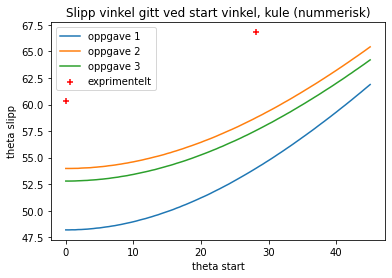

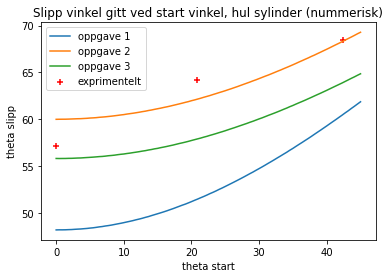

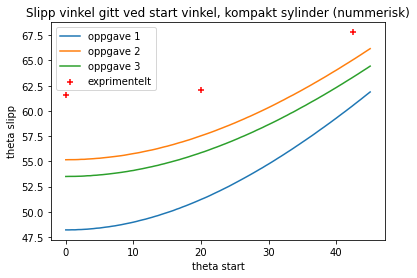

In [13]:
sammenligne = sammen_ligne(m_kule,r_kule,c_kule,'kule',målte0_k,målte_k)
sammenligne = sammen_ligne(m_sylinder_hul,r_sylinder_hul,c_sylinder_hul,'hul sylinder',målte0_hs,målte_hs)
sammenligne = sammen_ligne(m_sylinder_fast,r_sylinder_fast,c_sylinder_fast,'kompakt sylinder',målte0_fs,målte_fs)